In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error,make_scorer
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
import xgboost as xgb
import tensorflow
import keras_tuner
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,Input,LSTM,GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"C:\Users\BrunoNad\Downloads\Dataset Fuel Oil(Tabelle1).csv",sep=";")
data

,Timestamp,latitude,longitude,Unnamed: 3,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft speed PS [%],Shaft RPM PS [rpm],Shaft speed SB [%],...,Shaft Torque SB [kNm],Unnamed: 17,Unnamed: 18,Timestamp.2,Wind Speed [m/s],Unnamed: 21,Unnamed: 22,Timestamp.3,Fuel Consumpt. (TOTAL) [l/h],Electr. Consumpt. (TOTAL) [kW]
0,29.8.2025 22:30,"54,25","7,224167",NaN,29.8.2025 22:30,"9,4","229,8","62,6","140,2","53,9",...,"106,7",NaN,NaN,29.8.2025 22:30,"7,2",NaN,NaN,29.8.2025 21:30,"275,5",910.0
1,29.8.2025 22:33,"54,244168","7,210278",NaN,29.8.2025 22:32,"12,9","230,2","78,8","176,5","77,2",...,"223,1",NaN,NaN,29.8.2025 22:35,"13,4",NaN,NaN,29.8.2025 21:35,"244,1",893.0
2,29.8.2025 22:36,"54,232224","7,2",NaN,29.8.2025 22:34,"16,1","214,5","89,5","200,5","88,2",...,"272,3",NaN,NaN,29.8.2025 22:40,"10,2",NaN,NaN,29.8.2025 21:40,"247,9",934.0
3,29.8.2025 22:39,"54,216668","7,200556",NaN,29.8.2025 22:36,"18,1","179,3","99,9","223,8","99,8",...,"363,3",NaN,NaN,29.8.2025 22:45,"10,6",NaN,NaN,29.8.2025 21:45,"239,7",868.0
4,29.8.2025 22:42,"54,201388","7,201945",NaN,29.8.2025 22:38,19,"177,4","99,9","223,8","99,9",...,"338,2",NaN,NaN,29.8.2025 22:50,"8,9",NaN,NaN,29.8.2025 21:50,"238,9",859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data=data.iloc[:,[0,1,2,4,5,6,8,10,11,12,14,16,19,20,23,24,25]]
data

,Timestamp,latitude,longitude,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Timestamp.2,Wind Speed [m/s],Timestamp.3,Fuel Consumpt. (TOTAL) [l/h],Electr. Consumpt. (TOTAL) [kW]
0,29.8.2025 22:30,"54,25","7,224167",29.8.2025 22:30,"9,4","229,8","140,2","120,7",1160.0,646.0,"159,4","106,7",29.8.2025 22:30,"7,2",29.8.2025 21:30,"275,5",910.0
1,29.8.2025 22:33,"54,244168","7,210278",29.8.2025 22:32,"12,9","230,2","176,5","172,9",2266.0,2048.0,"241,0","223,1",29.8.2025 22:35,"13,4",29.8.2025 21:35,"244,1",893.0
2,29.8.2025 22:36,"54,232224","7,2",29.8.2025 22:34,"16,1","214,5","200,5","197,6",3085.0,2889.0,"285,7","272,3",29.8.2025 22:40,"10,2",29.8.2025 21:40,"247,9",934.0
3,29.8.2025 22:39,"54,216668","7,200556",29.8.2025 22:36,"18,1","179,3","223,8","223,6",4218.0,4386.0,"348,0","363,3",29.8.2025 22:45,"10,6",29.8.2025 21:45,"239,7",868.0
4,29.8.2025 22:42,"54,201388","7,201945",29.8.2025 22:38,19,"177,4","223,8","223,8",4050.0,4086.0,"335,2","338,2",29.8.2025 22:50,"8,9",29.8.2025 21:50,"238,9",859.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns = data.columns.str.strip()
data.columns

Index(['Timestamp', 'latitude', 'longitude', 'Timestamp.1',
       'Speed over Ground [knots]', 'Heading [degrees]', 'Shaft RPM PS  [rpm]',
       'Shaft RPM SB [rpm]', 'Shaft Power PS [kW]', 'Shaft Power SB  [kW]',
       'Shaft Torque PS  [kNm]', 'Shaft Torque SB [kNm]', 'Timestamp.2',
       'Wind Speed [m/s]', 'Timestamp.3', 'Fuel Consumpt. (TOTAL) [l/h]',
       'Electr. Consumpt. (TOTAL) [kW]'],
      dtype='object')

In [5]:
data1 = data[['Timestamp.1','Speed over Ground [knots]','Heading [degrees]','Shaft RPM PS  [rpm]',
               'Shaft RPM SB [rpm]','Shaft Power PS [kW]','Shaft Power SB  [kW]',
               'Shaft Torque PS  [kNm]','Shaft Torque SB [kNm]']]
data1=data1.dropna()
data1

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,29.8.2025 22:30,"9,4","229,8","140,2","120,7",1160.0,646.0,"159,4","106,7"
1,29.8.2025 22:32,"12,9","230,2","176,5","172,9",2266.0,2048.0,"241,0","223,1"
2,29.8.2025 22:34,"16,1","214,5","200,5","197,6",3085.0,2889.0,"285,7","272,3"
3,29.8.2025 22:36,"18,1","179,3","223,8","223,6",4218.0,4386.0,"348,0","363,3"
4,29.8.2025 22:38,19,"177,4","223,8","223,8",4050.0,4086.0,"335,2","338,2"
...,...,...,...,...,...,...,...,...,...
970,31.8.2025 6:50,0,"99,5","0,0","0,0",0.0,0.0,"0,0","0,0"
971,31.8.2025 6:52,0,"99,4","0,0","0,0",0.0,0.0,"0,0","0,0"
972,31.8.2025 6:54,0,"99,4","0,0","0,0",0.0,0.0,"0,0","0,0"
973,31.8.2025 6:56,0,"99,5","0,0","0,0",0.0,0.0,"0,0","0,0"


In [6]:
# type object -> type float 
for col in data1.columns[1:]:
    if data1[col].dtype == 'object':
        data1[col] = pd.to_numeric(data1[col].str.replace(',', '.'), errors='coerce')

In [7]:
data1['Timestamp.1'] = pd.to_datetime(data1['Timestamp.1'], format='%d.%m.%Y %H:%M')
data1

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,2025-08-29 22:30:00,9.4,229.8,140.2,120.7,1160.0,646.0,159.4,106.7
1,2025-08-29 22:32:00,12.9,230.2,176.5,172.9,2266.0,2048.0,241.0,223.1
2,2025-08-29 22:34:00,16.1,214.5,200.5,197.6,3085.0,2889.0,285.7,272.3
3,2025-08-29 22:36:00,18.1,179.3,223.8,223.6,4218.0,4386.0,348.0,363.3
4,2025-08-29 22:38:00,19.0,177.4,223.8,223.8,4050.0,4086.0,335.2,338.2
...,...,...,...,...,...,...,...,...,...
970,2025-08-31 06:50:00,0.0,99.5,0.0,0.0,0.0,0.0,0.0,0.0
971,2025-08-31 06:52:00,0.0,99.4,0.0,0.0,0.0,0.0,0.0,0.0
972,2025-08-31 06:54:00,0.0,99.4,0.0,0.0,0.0,0.0,0.0,0.0
973,2025-08-31 06:56:00,0.0,99.5,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def dataframe_new(df):
    df = df.copy()
    df['Timestamp'] = pd.to_datetime(df.iloc[:, 0])
    df = df.set_index('Timestamp')
    new_rows = []
    new_index = []
    zero_minute_indices = [i for i, t in enumerate(df.index) if t.minute % 10 == 0]

    for idx in range(len(zero_minute_indices) - 1):
        start_idx = zero_minute_indices[idx]
        end_idx = zero_minute_indices[idx + 1]
        new_rows.append(df.iloc[start_idx].values[1:])
        new_index.append(df.index[start_idx])
        if end_idx > start_idx + 1:
            intermediate_values = df.iloc[start_idx + 1:end_idx].values[:, 1:]
            avg_values = intermediate_values.mean(axis=0)
        else:
            avg_values = np.full(df.shape[1] - 1, np.nan)
        time1 = df.index[start_idx]
        time2 = df.index[end_idx]
        mid_time = time1 + (time2 - time1) / 2
        rounded_minute = 5 * round(mid_time.minute / 5)
        mid_time = mid_time.replace(minute=rounded_minute, second=0, microsecond=0)
        new_rows.append(avg_values)
        new_index.append(mid_time)
    last_zero_idx = zero_minute_indices[-1]
    new_rows.append(df.iloc[last_zero_idx].values[1:])
    new_index.append(df.index[last_zero_idx])
    new_df = pd.DataFrame(new_rows, columns=df.columns[1:], index=new_index)
    new_df.reset_index(inplace=True)
    new_df.rename(columns={'index': df.columns[0]}, inplace=True)

    return new_df

In [9]:
data1_new = dataframe_new(data1)
data1_new

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm]
0,2025-08-29 22:30:00,9.400,229.80,140.20,120.700,1160.00,646.00,159.400,106.700
1,2025-08-29 22:35:00,16.525,200.35,206.15,204.475,3404.75,3352.25,302.475,299.225
2,2025-08-29 22:40:00,19.100,177.00,223.80,223.800,4009.00,4022.00,330.900,332.300
3,2025-08-29 22:45:00,16.425,176.85,189.45,189.500,2361.25,2429.75,233.050,240.425
4,2025-08-29 22:50:00,16.200,176.90,189.50,189.300,2393.00,2475.00,236.200,245.300
...,...,...,...,...,...,...,...,...,...
384,2025-08-31 06:30:00,0.000,99.40,17.20,15.000,0.00,0.00,2.200,-0.400
385,2025-08-31 06:35:00,0.025,99.50,15.00,15.000,0.00,0.00,-0.300,-1.450
386,2025-08-31 06:40:00,0.000,99.40,15.00,15.000,0.00,0.00,0.400,-1.800
387,2025-08-31 06:45:00,0.000,99.50,3.75,0.000,1.25,0.00,0.100,0.000


In [10]:
data_wind=data['Wind Speed [m/s]'].dropna()
data_wind=data_wind[:-1]
data_wind=pd.to_numeric(data_wind.str.replace(',', '.'))
data_wind

0       7.2
1      13.4
2      10.2
3      10.6
4       8.9
       ... 
384     4.8
385     4.3
386     5.0
387     4.0
388     4.8
Name: Wind Speed [m/s], Length: 389, dtype: float64

In [11]:
data_fuel=data['Fuel Consumpt. (TOTAL) [l/h]'].dropna()
data_fuel=pd.to_numeric(data_fuel.str.replace(',', '.'))
data_fuel=data_fuel[12:-1].reset_index().drop('index',axis=1)
data_fuel

,Fuel Consumpt. (TOTAL) [l/h]
0,677.1
1,2181.8
2,2435.5
3,1527.5
4,1508.9
...,...
384,204.7
385,212.5
386,215.7
387,202.5


In [12]:
table=pd.concat([data1_new,data_wind,data_fuel],axis=1)
table

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h]
0,2025-08-29 22:30:00,9.400,229.80,140.20,120.700,1160.00,646.00,159.400,106.700,7.2,677.1
1,2025-08-29 22:35:00,16.525,200.35,206.15,204.475,3404.75,3352.25,302.475,299.225,13.4,2181.8
2,2025-08-29 22:40:00,19.100,177.00,223.80,223.800,4009.00,4022.00,330.900,332.300,10.2,2435.5
3,2025-08-29 22:45:00,16.425,176.85,189.45,189.500,2361.25,2429.75,233.050,240.425,10.6,1527.5
4,2025-08-29 22:50:00,16.200,176.90,189.50,189.300,2393.00,2475.00,236.200,245.300,8.9,1508.9
...,...,...,...,...,...,...,...,...,...,...,...
384,2025-08-31 06:30:00,0.000,99.40,17.20,15.000,0.00,0.00,2.200,-0.400,4.8,204.7
385,2025-08-31 06:35:00,0.025,99.50,15.00,15.000,0.00,0.00,-0.300,-1.450,4.3,212.5
386,2025-08-31 06:40:00,0.000,99.40,15.00,15.000,0.00,0.00,0.400,-1.800,5.0,215.7
387,2025-08-31 06:45:00,0.000,99.50,3.75,0.000,1.25,0.00,0.100,0.000,4.0,202.5


In [197]:
table.columns

Index(['Timestamp.1', 'Speed over Ground [knots]', 'Heading [degrees]',
       'Shaft RPM PS  [rpm]', 'Shaft RPM SB [rpm]', 'Shaft Power PS [kW]',
       'Shaft Power SB  [kW]', 'Shaft Torque PS  [kNm]',
       'Shaft Torque SB [kNm]', 'Wind Speed [m/s]',
       'Fuel Consumpt. (TOTAL) [l/h]'],
      dtype='object')

In [54]:
table.describe()

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h]
count,389,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,2025-08-30 14:40:00.000000256,7.543188,162.750835,104.781748,106.584833,1031.169666,1037.738432,114.800964,117.067995,9.126221,799.457326
min,2025-08-29 22:30:00,0.000000,12.900000,-122.300000,-122.300000,-64.000000,-55.000000,-94.600000,-90.600000,0.000000,163.300000
25%,2025-08-30 06:35:00,0.300000,108.050000,52.300000,51.025000,94.500000,82.000000,35.225000,33.775000,7.300000,314.200000
50%,2025-08-30 14:40:00,5.800000,167.325000,82.900000,82.600000,287.750000,278.000000,63.975000,69.525000,9.600000,393.800000
75%,2025-08-30 22:45:00,13.450000,200.600000,163.250000,163.100000,1583.000000,1555.250000,185.175000,181.825000,10.900000,1091.700000
max,2025-08-31 06:50:00,19.300000,358.100000,223.800000,223.800000,4009.000000,4022.000000,330.900000,332.300000,21.400000,2490.000000
std,NaN,7.101163,60.291359,69.552622,67.948216,1305.665707,1301.283045,108.813856,107.596641,2.635803,699.173095


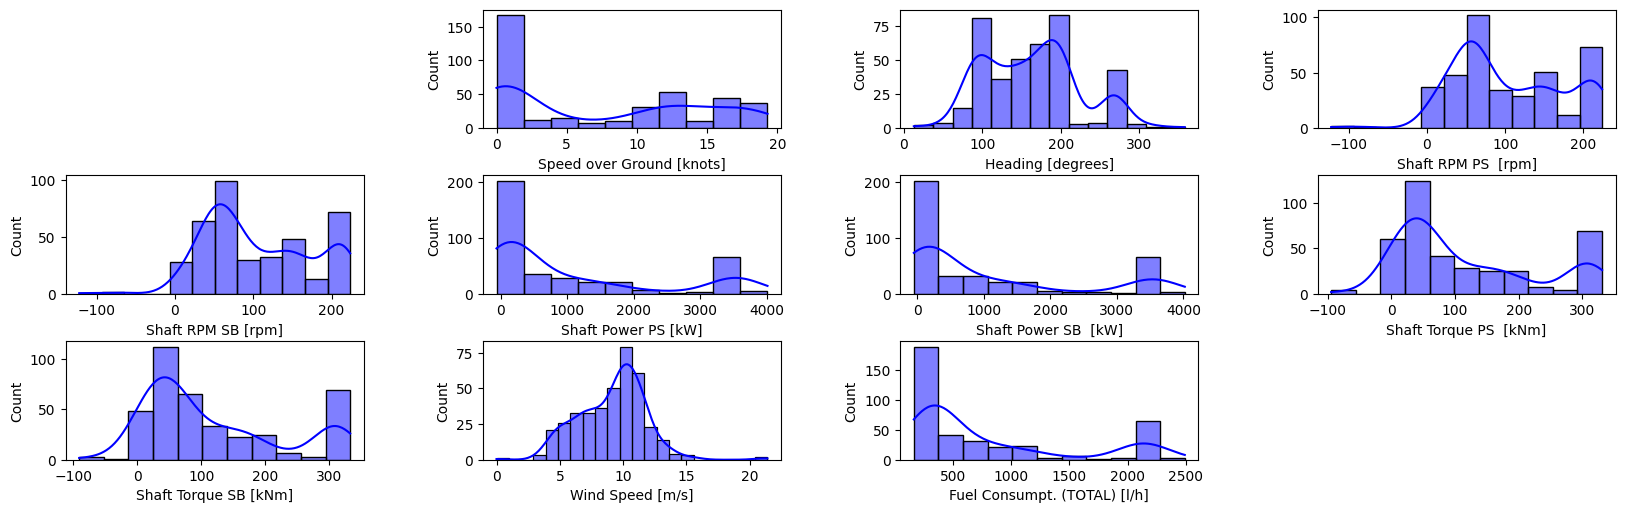

In [14]:
fig=plt.figure(figsize=[20,8])
fig.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(2,len(table.columns)+1):
    ax=fig.add_subplot(4,4,i)
    sns.histplot(data=table,x=table[table.columns[i-1]],kde=True,color="b")
plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/distributions.png")
plt.show()

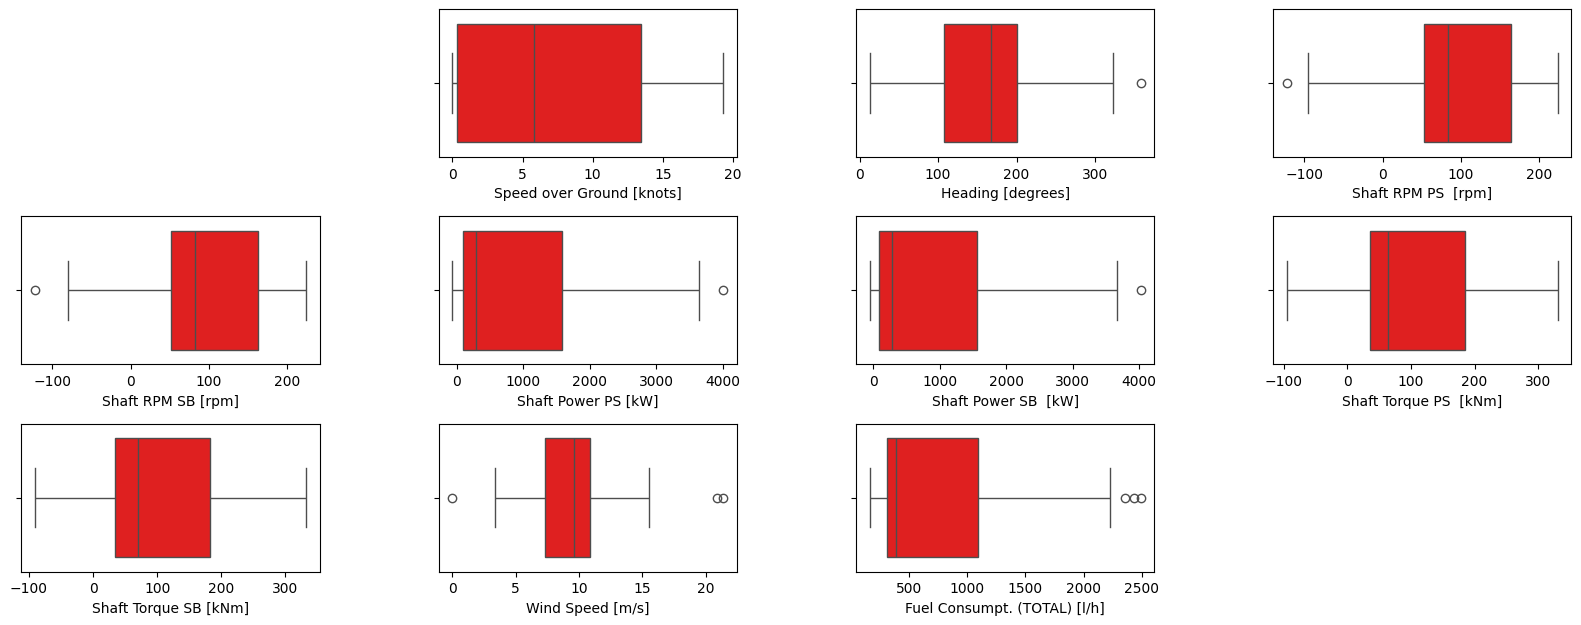

In [15]:
fig = plt.figure(figsize=[20,10])
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2,len(table.columns)+1):
    ax = fig.add_subplot(4,4,i)
    sns.boxplot(x=table[table.columns[i-1]],color="red")
#plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/boxplots.png")
plt.show()

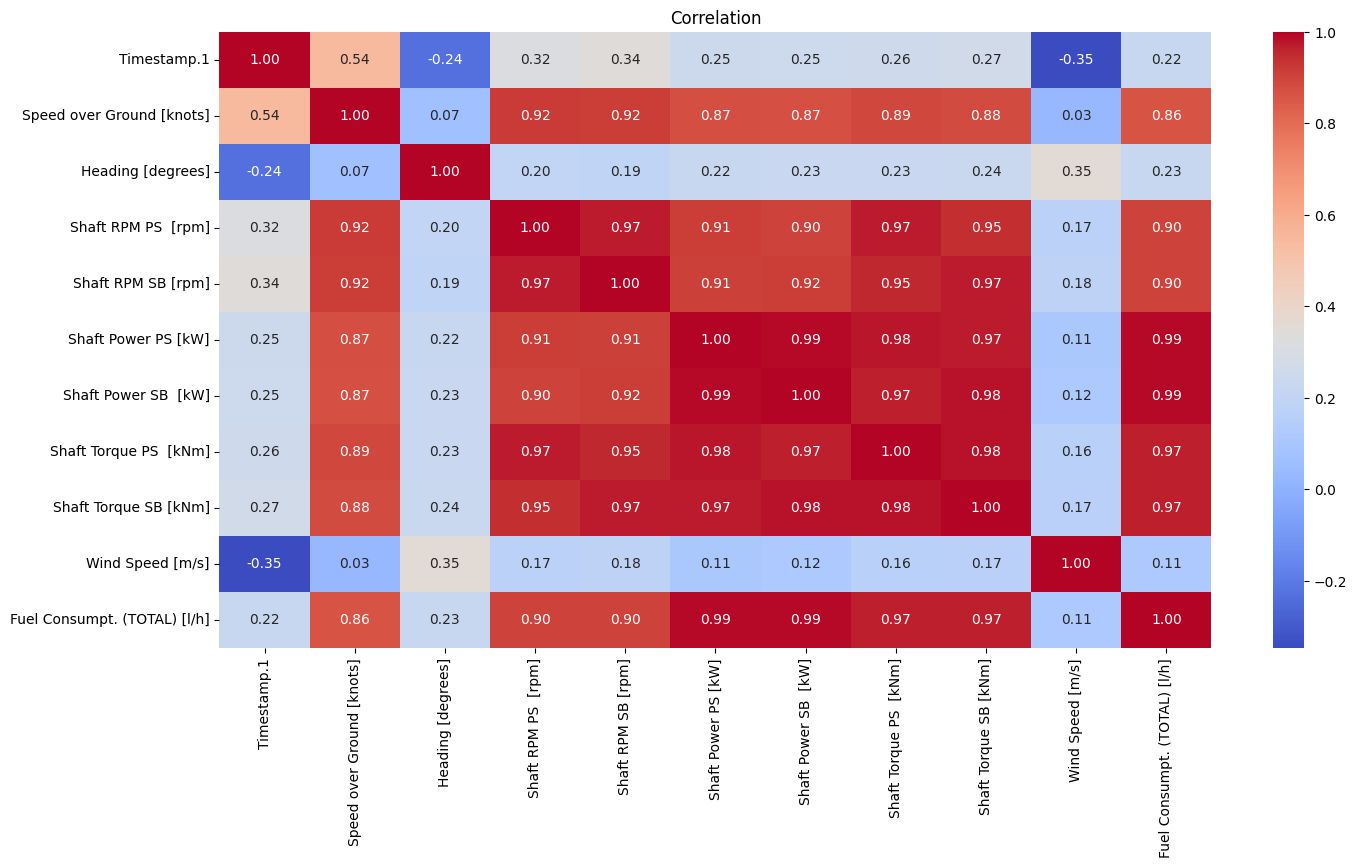

In [16]:
plt.figure(figsize=[16,8])
sns.heatmap(table.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation")
#plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/matrix_correlation.png")
plt.show()

In [ ]:
# 25:30 + 6:50 = 32: 20 h  / 2 = 16: 10 h

In [ ]:
# from 30.8.2025 12:45 until 30.8.2025 16:15 ------> consumption is higher then usual
# from 30.8.2025 19:50 until 30.8.2025 23:40 ------> consumption is higher then usual

In [92]:
hours= data1['Timestamp.1'].dt.hour

In [93]:
table['hour_sin']=np.sin(2 * np.pi * hours / 24)
table['hour_cos']=np.cos(2 * np.pi * hours/ 24)

In [94]:
table

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],Fuel Consumpt. (TOTAL) [l/h],hour_sin,hour_cos
0,2025-08-29 22:30:00,9.400,229.80,140.20,120.700,1160.00,646.00,159.400,106.700,7.2,677.1,-0.500000,0.866025
1,2025-08-29 22:35:00,16.525,200.35,206.15,204.475,3404.75,3352.25,302.475,299.225,13.4,2181.8,-0.500000,0.866025
2,2025-08-29 22:40:00,19.100,177.00,223.80,223.800,4009.00,4022.00,330.900,332.300,10.2,2435.5,-0.500000,0.866025
3,2025-08-29 22:45:00,16.425,176.85,189.45,189.500,2361.25,2429.75,233.050,240.425,10.6,1527.5,-0.500000,0.866025
4,2025-08-29 22:50:00,16.200,176.90,189.50,189.300,2393.00,2475.00,236.200,245.300,8.9,1508.9,-0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2025-08-31 06:30:00,0.000,99.40,17.20,15.000,0.00,0.00,2.200,-0.400,4.8,204.7,0.258819,-0.965926
385,2025-08-31 06:35:00,0.025,99.50,15.00,15.000,0.00,0.00,-0.300,-1.450,4.3,212.5,0.258819,-0.965926
386,2025-08-31 06:40:00,0.000,99.40,15.00,15.000,0.00,0.00,0.400,-1.800,5.0,215.7,0.258819,-0.965926
387,2025-08-31 06:45:00,0.000,99.50,3.75,0.000,1.25,0.00,0.100,0.000,4.0,202.5,0.258819,-0.965926


### Lags

In [13]:
def add_lags_target(df,target_column,lag_steps):
    for i in range(1,lag_steps+1):
        df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
    return df

In [14]:
table=add_lags_target(table,'Fuel Consumpt. (TOTAL) [l/h]',12).dropna().reset_index(drop=True)
table

,Timestamp.1,Speed over Ground [knots],Heading [degrees],Shaft RPM PS [rpm],Shaft RPM SB [rpm],Shaft Power PS [kW],Shaft Power SB [kW],Shaft Torque PS [kNm],Shaft Torque SB [kNm],Wind Speed [m/s],...,Fuel Consumpt. (TOTAL) [l/h]_lag_3,Fuel Consumpt. (TOTAL) [l/h]_lag_4,Fuel Consumpt. (TOTAL) [l/h]_lag_5,Fuel Consumpt. (TOTAL) [l/h]_lag_6,Fuel Consumpt. (TOTAL) [l/h]_lag_7,Fuel Consumpt. (TOTAL) [l/h]_lag_8,Fuel Consumpt. (TOTAL) [l/h]_lag_9,Fuel Consumpt. (TOTAL) [l/h]_lag_10,Fuel Consumpt. (TOTAL) [l/h]_lag_11,Fuel Consumpt. (TOTAL) [l/h]_lag_12
0,2025-08-29 23:30:00,0.100,89.30,33.200,34.00,23.00,0.0,14.900,3.60,7.6,...,313.9,632.3,349.7,705.7,1506.9,1508.9,1527.5,2435.5,2181.8,677.1
1,2025-08-29 23:35:00,0.175,83.30,33.000,22.15,25.00,4.5,14.475,5.75,6.7,...,408.3,313.9,632.3,349.7,705.7,1506.9,1508.9,1527.5,2435.5,2181.8
2,2025-08-29 23:40:00,0.500,74.70,19.500,67.90,0.00,127.0,4.700,42.60,6.5,...,265.5,408.3,313.9,632.3,349.7,705.7,1506.9,1508.9,1527.5,2435.5
3,2025-08-29 23:45:00,0.700,77.85,57.125,62.10,177.50,193.5,49.500,49.75,7.1,...,294.6,265.5,408.3,313.9,632.3,349.7,705.7,1506.9,1508.9,1527.5
4,2025-08-29 23:50:00,0.800,151.50,69.900,20.60,182.00,5.0,55.300,9.10,8.2,...,284.2,294.6,265.5,408.3,313.9,632.3,349.7,705.7,1506.9,1508.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2025-08-31 06:30:00,0.000,99.40,17.200,15.00,0.00,0.0,2.200,-0.40,4.8,...,217.2,248.0,234.0,228.7,227.2,207.4,302.9,308.0,368.6,475.9
373,2025-08-31 06:35:00,0.025,99.50,15.000,15.00,0.00,0.0,-0.300,-1.45,4.3,...,217.6,217.2,248.0,234.0,228.7,227.2,207.4,302.9,308.0,368.6
374,2025-08-31 06:40:00,0.000,99.40,15.000,15.00,0.00,0.0,0.400,-1.80,5.0,...,212.0,217.6,217.2,248.0,234.0,228.7,227.2,207.4,302.9,308.0
375,2025-08-31 06:45:00,0.000,99.50,3.750,0.00,1.25,0.0,0.100,0.00,4.0,...,204.7,212.0,217.6,217.2,248.0,234.0,228.7,227.2,207.4,302.9


In [15]:
X=table.drop(['Timestamp.1','Fuel Consumpt. (TOTAL) [l/h]'],axis=1)
y=table['Fuel Consumpt. (TOTAL) [l/h]']

In [110]:
from scipy.stats import pearsonr

In [111]:
def pearson_correlation(df, target_column):
    correlations = {}
    for col in df.columns:
        if col != target_column:
            corr, p_value = pearsonr(df[col], df[target_column])
            correlations[col] = {'pearson_corr': corr, 'p_value': p_value}
    return pd.DataFrame(correlations).T

In [112]:
result=pearson_correlation(table.iloc[:,1:],'Fuel Consumpt. (TOTAL) [l/h]')
result

,pearson_corr,p_value
Speed over Ground [knots],0.860542,6.608137e-112
Heading [degrees],0.217442,2.053440e-05
Shaft RPM PS [rpm],0.900445,1.207175e-137
Shaft RPM SB [rpm],0.900758,6.897774e-138
Shaft Power PS [kW],0.994609,0.000000e+00
Shaft Power SB [kW],0.991985,0.000000e+00
Shaft Torque PS [kNm],0.969507,4.052997e-231
Shaft Torque SB [kNm],0.967400,9.153225e-226
Wind Speed [m/s],0.099719,5.304073e-02
Fuel Consumpt. (TOTAL) [l/h]_lag_1,0.955790,1.959602e-201


In [61]:
table.columns

Index(['Timestamp.1', 'Speed over Ground [knots]', 'Heading [degrees]',
       'Shaft RPM PS  [rpm]', 'Shaft RPM SB [rpm]', 'Shaft Power PS [kW]',
       'Shaft Power SB  [kW]', 'Shaft Torque PS  [kNm]',
       'Shaft Torque SB [kNm]', 'Wind Speed [m/s]',
       'Fuel Consumpt. (TOTAL) [l/h]', 'hour_sin', 'hour_cos',
       'Fuel Consumpt. (TOTAL) [l/h]_lag_1',
       'Fuel Consumpt. (TOTAL) [l/h]_lag_2',
       'Fuel Consumpt. (TOTAL) [l/h]_lag_3'],
      dtype='object')

In [20]:
data_lat_long=data.iloc[:,[1,2]].dropna().reset_index().drop('index',axis=1)
data_lat_long

,latitude,longitude
0,"54,25","7,224167"
1,"54,244168","7,210278"
2,"54,232224","7,2"
3,"54,216668","7,200556"
4,"54,201388","7,201945"
...,...,...
642,"53,173336","8,591112"
643,"53,173336","8,591112"
644,"53,173336","8,591112"
645,"53,173336","8,591112"


In [14]:
# Train-valid-test split
train_end = int(X.shape[0] * 0.7)
val_end = int(X.shape[0] * 0.85)
Xtrain=X[:train_end]
Xvalid=X[train_end:val_end]
Xtest=X[val_end:]
ytrain=y[:train_end]
yvalid=y[train_end:val_end]
ytest=y[val_end:]

In [16]:
#Train-test split
train_end=int(X.shape[0]*0.7)
Xtrain=X[:train_end]
ytrain=y[:train_end]
Xtest=X[train_end:]
ytest=y[train_end:]

#### Linear regression

In [21]:
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
predlr=lr.predict(Xtest)

In [22]:
print("MAE: ",round(mean_absolute_error(predlr,ytest),2),"\t MSE: ",round(mean_squared_error(predlr,ytest),2),"\t MAPE: ",round(mean_absolute_percentage_error(predlr,ytest)*100,2),"%")

MAE:  53.22 	 MSE:  6712.75 	 MAPE:  8.16 %


In [ ]:
#pd.DataFrame({'actual':ytest,'predicted':predlr,'error':abs(ytest-predlr)}).to_csv("C:/Users/BrunoNad/Documents/Project_consumption/results_LR_lags12.csv")

In [117]:
pd.DataFrame({'column':Xtrain.columns,'coefficient':lr.coef_})

,column,coefficient
0,Speed over Ground [knots],0.683006
1,Heading [degrees],-0.047539
2,Shaft RPM PS [rpm],0.454697
3,Shaft RPM SB [rpm],-2.097342
4,Shaft Power PS [kW],0.461603
5,Shaft Power SB [kW],-0.075753
6,Shaft Torque PS [kNm],-0.804308
7,Shaft Torque SB [kNm],2.936112
8,Wind Speed [m/s],-2.719691
9,Fuel Consumpt. (TOTAL) [l/h]_lag_1,0.092525


In [118]:
lr.intercept_

np.float64(287.57644561993806)

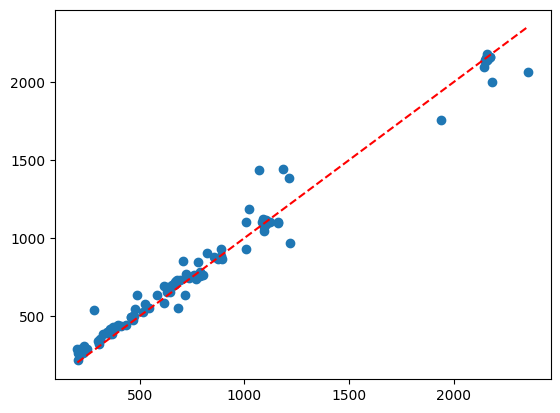

In [119]:
min_val = min(min(ytest), min(predlr))
max_val = max(max(ytest), max(predlr))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest,predlr)
plt.plot(x, y, color='red', linestyle='--')
plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/graph_error_LR_lags12")
plt.show()

In [122]:
ytrain

0       294.6
1       284.2
2       290.9
3       427.6
4       310.4
        ...  
258    2155.7
259    2149.4
260    2154.9
261    2155.8
262    2150.8
Name: Fuel Consumpt. (TOTAL) [l/h], Length: 263, dtype: float64

### Ridge Regression

In [45]:
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [46]:
tscv = TimeSeriesSplit(n_splits=5)
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring=mse_scorer, cv=tscv)
grid_search_ridge.fit(Xtrain, ytrain)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [47]:
best_model_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_model_ridge.predict(Xtest)
test_mse = mean_squared_error(ytest, y_pred_ridge)

print("The best parametar alpha: ",grid_search_ridge.best_params_['alpha'])

The best parametar alpha:  100


In [48]:
pd.DataFrame({'actual':ytest,'predicted':y_pred_ridge,'error':abs(ytest-y_pred_ridge)})

,actual,predicted,error
272,2154.9,2149.247229,5.652771
273,2155.8,2117.606325,38.193675
274,2150.8,2131.811423,18.988577
275,2145.7,2127.106504,18.593496
276,2154.9,2139.545029,15.354971
...,...,...,...
384,204.7,260.204939,55.504939
385,212.5,261.683223,49.183223
386,215.7,257.359202,41.659202
387,202.5,250.730596,48.230596


In [49]:
print("MAE: ",mean_absolute_error(best_model_ridge.predict(Xtest),ytest),"\t MSE: ",mean_squared_error(best_model_ridge.predict(Xtest),ytest),"\t MAPE: ",round(mean_absolute_percentage_error(best_model_ridge.predict(Xtest),ytest)*100,2),"%")

MAE:  57.521592825750716 	 MSE:  6450.049427275793 	 MAPE:  9.55 %


### Lasso Regression

In [54]:
lasso = Lasso(max_iter=10000)

In [55]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [56]:
tscv = TimeSeriesSplit(n_splits=5)
grid_search_lasso = GridSearchCV(lasso, param_grid, scoring=mse_scorer, cv=tscv)
grid_search_lasso.fit(Xtrain, ytrain)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.314e+04, tolerance: 1.063e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.597e+04, tolerance: 1.170e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [57]:
best_model_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_model_lasso.predict(Xtest)
test_mse = mean_squared_error(ytest, y_pred_lasso)

print("The best parametar alpha: ",grid_search_lasso.best_params_['alpha'])

The best parametar alpha:  100


In [58]:
print("MAE: ",mean_absolute_error(best_model_lasso.predict(Xtest),ytest),"\t MSE: ",mean_squared_error(best_model_lasso.predict(Xtest),ytest),"\t MAPE: ",round(mean_absolute_percentage_error(best_model_lasso.predict(Xtest),ytest)*100,2),"%")

MAE:  54.887505950720154 	 MSE:  5971.062732257876 	 MAPE:  9.11 %


In [59]:
pd.DataFrame({'feature':X.columns,'coeff':best_model_lasso.coef_})

,feature,coeff
0,Speed over Ground [knots],0.000000
1,Heading [degrees],-0.042293
2,Shaft RPM PS [rpm],0.000000
3,Shaft RPM SB [rpm],0.000000
4,Shaft Power PS [kW],0.393775
5,Shaft Power SB [kW],0.136380
6,Shaft Torque PS [kNm],-0.008241
7,Shaft Torque SB [kNm],0.000000
8,Wind Speed [m/s],-0.000000


#### RandomForest Regressor

In [22]:
rf=RandomForestRegressor()

In [23]:
param_grid = {
    'n_estimators': range(10, 200, 10),
    'max_depth': range(1,20),
    'criterion':['squared_error']
}

In [24]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [25]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(1, 20),
                         'n_estimators': range(10, 200, 10)},
             scoring='neg_mean_squared_error')

In [26]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 19, 'n_estimators': 60}

In [27]:
rf_best=grid_search.best_estimator_

In [28]:
print("MAE: ",mean_absolute_error(rf_best.predict(Xtest),ytest),"\t MSE: ",mean_squared_error(rf_best.predict(Xtest),ytest),"\t MAPE: ",round(mean_absolute_percentage_error(rf_best.predict(Xtest),ytest)*100,2),"%")

MAE:  110.6921367521369 	 MSE:  19869.032924264025 	 MAPE:  15.38 %


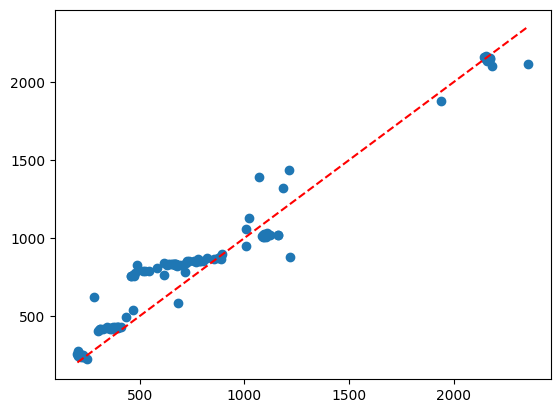

In [208]:
min_val = min(min(ytest), min(rf_best.predict(Xtest)))
max_val = max(max(ytest), max(rf_best.predict(Xtest)))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest,rf_best.predict(Xtest))
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [209]:
pd.DataFrame({'actual':ytest,'predicted':rf_best.predict(Xtest),'error':abs(rf_best.predict(Xtest)-ytest)})

,actual,predicted,error
270,2155.8,2154.247778,1.552222
271,2150.8,2151.760000,0.960000
272,2145.7,2155.776111,10.076111
273,2154.9,2145.811667,9.088333
274,2161.1,2139.170556,21.929444
...,...,...,...
381,204.7,246.951667,42.251667
382,212.5,247.429444,34.929444
383,215.7,251.788333,36.088333
384,202.5,256.747222,54.247222


In [210]:
importances = rf_best.feature_importances_
pd.DataFrame({"Importance":importances,"Names":X.columns})

,Importance,Names
0,0.051408,Speed over Ground [knots]
1,0.004575,Heading [degrees]
2,0.225190,Shaft RPM PS [rpm]
3,0.149014,Shaft RPM SB [rpm]
4,0.152468,Shaft Power PS [kW]
5,0.128628,Shaft Power SB [kW]
6,0.098985,Shaft Torque PS [kNm]
7,0.148498,Shaft Torque SB [kNm]
8,0.008455,Wind Speed [m/s]
9,0.017240,Fuel Consumpt. (TOTAL) [l/h]_lag_1


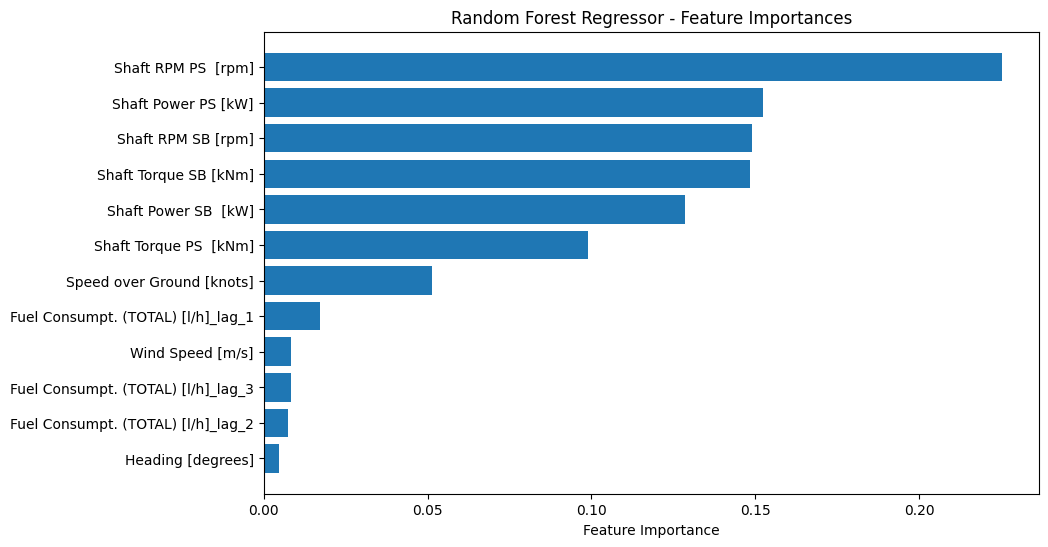

In [211]:
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor - Feature Importances")
plt.show()

In [212]:
from joblib import dump, load

In [213]:
dump(rf_best, 'C:/Users/BrunoNad/Documents/Project_consumption/randomforest.joblib')

['C:/Users/BrunoNad/Documents/Project_consumption/randomforest.joblib']

In [214]:
rf_best=load('C:/Users/BrunoNad/Documents/Project_consumption/randomforest.joblib')

In [215]:
rf_best

RandomForestRegressor(criterion='absolute_error', max_depth=12, n_estimators=90)

In [216]:
rf_best.predict(Xtest)

array([2154.24777778, 2151.76      , 2155.77611111, 2145.81166667,
       2139.17055556, 2145.88222222, 2154.44944444, 2152.93777778,
       2164.91944444, 2153.62666667, 2155.02388889, 2158.77166667,
       1392.40666667, 1034.54555556, 1008.04111111, 1016.02      ,
       1015.52444444, 1008.99555556, 1015.42222222, 1015.42222222,
       1015.37222222, 1013.12      , 1008.84333333, 1027.70222222,
       1016.42555556, 1014.31444444, 1016.42555556, 1016.25555556,
       1016.25555556, 1021.66333333,  865.21444444,  850.15055556,
        849.25833333,  850.835     ,  851.13944444,  851.04722222,
        808.015     ,  836.30944444,  839.83388889,  764.795     ,
        879.13      , 1877.17333333, 2117.50444444, 1319.09444444,
       1432.56222222, 2102.19388889, 2130.78555556, 1130.45555556,
       1058.05222222,  945.71666667,  900.42666667,  839.44777778,
        853.515     ,  849.52722222,  825.345     ,  830.81833333,
        826.20833333,  788.90722222,  791.28277778,  789.54833

#### XGBoost

#### lags=3

In [164]:
Xtrain.columns = Xtrain.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)
Xvalid.columns = Xvalid.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)
Xtest.columns = Xtest.columns.str.replace(r'[\[\]<>\{\}]', '', regex=True)

In [165]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dval = xgb.DMatrix(Xvalid, label=yvalid)
dtest = xgb.DMatrix(Xtest, label=ytest)

In [166]:
param_grid = {
    'learning_rate':[i/100 for i in range(1,21,1)],
    'max_depth': [3,4,5,10,15],
    'subsample': [0.8,0.9]
}

In [167]:
best_mae = float('inf')
best_params = {}
best_num_round = 0

for lr in param_grid['learning_rate']:
    for depth in param_grid['max_depth']:
        for subsample in param_grid['subsample']:
            params = {
                'objective': 'reg:squarederror',
                'learning_rate': lr,
                'max_depth': depth,
                'subsample': subsample,
                'eval_metric': 'mae'
            }
            model = xgb.train(
                params,
                dtrain,
                num_boost_round=2000,
                evals=[(dval, 'val')],
                early_stopping_rounds=50,
                verbose_eval=False
            )
            best_iter = model.best_iteration
            val_preds = model.predict(dval, iteration_range=(0, best_iter))
            current_mae = mean_absolute_error(yvalid, val_preds)
            
            if current_mae < best_mae:
                best_mae = current_mae
                best_params = params.copy()
                best_num_round = best_iter

In [168]:
print("Best parameters: ",best_params)
print("Optimal number of rounds: ",best_num_round)

Best parameters:  {'objective': 'reg:squarederror', 'learning_rate': 0.17, 'max_depth': 15, 'subsample': 0.9, 'eval_metric': 'mae'}
Optimal number of rounds:  31


In [169]:
XGB= xgb.train(
    best_params,
    xgb.DMatrix(np.concatenate([Xtrain, Xvalid]), label=np.concatenate([ytrain, yvalid])),
    num_boost_round=best_num_round
)

In [170]:
print("MAE: ",mean_absolute_error(ytest, XGB.predict(dtest)),"\n MSE: ",mean_squared_error(ytest,XGB.predict(dtest)),"\n MAPE: ",round(mean_absolute_percentage_error(ytest,XGB.predict(dtest))*100,2),"%")

MAE:  73.82104371169517 
 MSE:  8925.356172991818 
 MAPE:  21.08 %


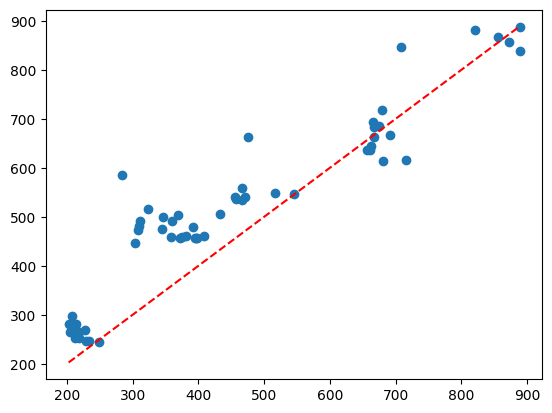

In [171]:
min_val = min(min(ytest), min(XGB.predict(dtest).flatten()))
max_val = max(max(ytest), max(XGB.predict(dtest).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest,XGB.predict(dtest).flatten())
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [172]:
pd.DataFrame({'actual':ytest,'predicted':XGB.predict(dtest).flatten(),'error':abs(ytest-XGB.predict(dtest).flatten())})

,actual,predicted,error
328,515.9,547.645813,31.745813
329,545.0,547.484741,2.484741
330,465.8,534.283264,68.483264
331,470.8,540.965149,70.165149
332,457.1,537.210693,80.110693
333,456.2,540.965149,84.765149
334,466.4,558.842957,92.442957
335,394.5,456.040863,61.540863
336,395.8,457.047119,61.247119
337,391.8,479.516022,87.716022


In [173]:
pd.DataFrame({'actual':ytest,'predicted':XGB.predict(dtest).flatten(),'error':abs(ytest-XGB.predict(dtest).flatten())}).to_csv("C:/Users/BrunoNad/Documents/Project_consumption/resultsXGB.csv",index=False)

In [174]:
XGB.save_model(r"C:/Users/BrunoNad/Documents/Project_consumption/XGB_model.json")

In [35]:
XGB=xgb.Booster()
XGB.load_model("XGB.json")

#### Neural network

###### ws=3

In [15]:
scaler = StandardScaler()

In [16]:
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xvalid_scaled = scaler.transform(Xvalid)
Xtest_scaled=scaler.transform(Xtest)

In [171]:
import joblib

In [172]:
joblib.dump(scaler,'scaler.save')

['scaler.save']

In [ ]:
#scaler = joblib.load('scaler.save')

In [173]:
import base64
import io

In [174]:
scaler = joblib.load("scaler.save")
buf = io.BytesIO()
joblib.dump(scaler, buf)
buf.seek(0)

scaler_bytes = buf.read()
scaler_b64 = base64.b64encode(scaler_bytes).decode('ascii')

with open("scaler_bytes.py", "w") as f:
    f.write(f"scaler_b64 = '''{scaler_b64}'''")

In [17]:
def cs(data, window_size):
    X = []
    for i in range(len(data) - window_size + 1):
        X.append(data[i:i+window_size])
    return np.array(X)

In [18]:
ws = 5
Xtrain_seq = cs(Xtrain_scaled, ws)
Xvalid_seq = cs(Xvalid_scaled, ws)
Xtest_seq = cs(Xtest_scaled, ws)


In [19]:
ytrain_adj = ytrain[ws-1:].reset_index(drop=True)
yvalid_adj = yvalid[ws-1:].reset_index(drop=True)
ytest_adj = ytest[ws-1:].reset_index(drop=True)

In [ ]:
""" # nn2
model = Sequential([
    LSTM(16, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(16, kernel_regularizer=l2(0.01), activation='relu',return_sequences=True),                           
    LSTM(8, activation='relu'),                                                    
    Dense(1, activation='linear')                       
])

# MSE: 9061.527815136062
# MAE: 65.11838796515214
# MAPE: 14.32% """

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
""" # nn1
model = Sequential([
    LSTM(64, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(32, kernel_regularizer=l2(0.01), activation='relu',return_sequences=True),                           
    LSTM(32, activation='relu'),                                                    
    Dense(1, activation='linear')                       
])

# MSE: 8995.646639207207
# MAE: 61.142351009971215
# MAPE: 12.3% """



c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
""" # nn3
model = Sequential([
    LSTM(32, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(32, kernel_regularizer=l2(0.01), activation='relu',return_sequences=True),                           
    LSTM(32, activation='relu'),                                                    
    Dense(1, activation='linear')                       
])

# ws=3 
# MSE: 4182.582533195222
# MAE: 49.252360989754656
# MAPE: 9.97% """

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# nn7
""" model = Sequential([
    LSTM(16, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(16, kernel_regularizer=l2(0.01), activation='relu',return_sequences=True),                           
    LSTM(8, activation='relu'),                                                    
    Dense(1, activation='linear')                       
]) """

# MAE:  42.49073480974164 
# MSE:  3044.855836521498 
# MAPE:  10.05 %

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# nn4
model = Sequential([
    LSTM(32, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(32, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01),),                   
    LSTM(32, activation='relu',kernel_regularizer=l2(0.01),),                                                    
    Dense(1, activation='linear')])                    
# MAE:  47.96244662100809 
# MSE:  3901.567807273797 
# MAPE:  11.05 %

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model = Sequential([
    LSTM(32, kernel_regularizer=l2(0.01), return_sequences=True, activation='relu',input_shape=(Xtrain_seq.shape[1],Xtrain_seq.shape[2])),  
    LSTM(32, kernel_regularizer=l2(0.01), activation='relu',return_sequences=True),                           
    LSTM(32, activation='relu'),                                                    
    Dense(1, activation='linear')                       
])

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [51]:
history = model.fit(Xtrain_seq, ytrain_adj,epochs=200,batch_size=32,validation_data=(Xvalid_seq, yvalid_adj),callbacks=[EarlyStopping(patience=20,monitor='val_loss',restore_best_weights=True,mode='min')],verbose=0)

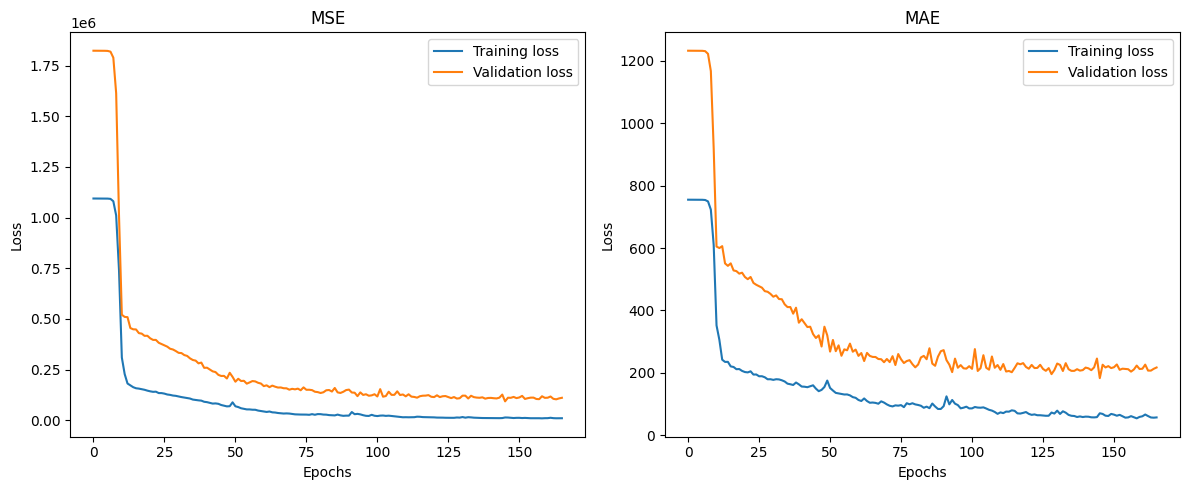

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training loss')
plt.plot(history.history['val_mae'], label='Validation loss')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.save(r"C:/Users/BrunoNad/Documents/Project_consumption/naziv.keras")

In [21]:
from tensorflow.keras.models import load_model

In [175]:
model = load_model(r"C:/Users/BrunoNad/Documents/Project_consumption/nn7.keras")

In [179]:
model.save("C:/Users/BrunoNad/Documents/Project_consumption/temp_model.keras")

In [180]:
import shutil
import os

shutil.make_archive("model_zip", 'zip', "temp_model")

with open("model_zip.zip", "rb") as model_file:
    model_bytes = model_file.read()

model_b64 = base64.b64encode(model_bytes).decode('ascii')

# Spremi u datoteku
with open("model_bytes.py", "w") as f:
    f.write(f"model_b64 = '''{model_b64}'''")

In [126]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 3, 64)          │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 3, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,173 (996.77 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170,116 (664.52 KB)

In [43]:
pd.DataFrame({'actual':ytest_adj,'predicted':model.predict(Xtest_seq).flatten(),'diff':abs(model.predict(Xtest_seq).flatten()-ytest_adj)})

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,actual,predicted,diff
0,470.8,342.315674,128.484326
1,457.1,349.673706,107.426294
2,456.2,327.190216,129.009784
3,466.4,319.006348,147.393652
4,394.5,311.619263,82.880737
5,395.8,308.011047,87.788953
6,391.8,304.964478,86.835522
7,397.4,296.007019,101.392981
8,409.0,294.362732,114.637268
9,372.4,292.659454,79.740546


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


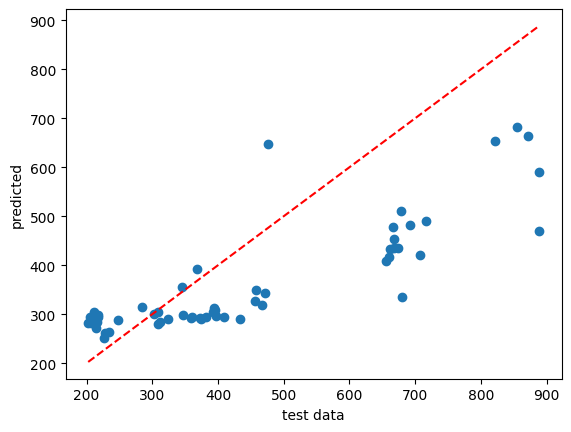

In [44]:
min_val = min(min(ytest_adj), min(model.predict(Xtest_seq).flatten()))
max_val = max(max(ytest_adj), max(model.predict(Xtest_seq).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest_adj,model.predict(Xtest_seq).flatten())
plt.plot(x, y, color='red', linestyle='--')

plt.xlabel("test data")
plt.ylabel("predicted")
plt.show()

In [26]:
print("MAE: ",mean_absolute_error(model.predict(Xtest_seq).flatten(),ytest_adj),"\n MSE: ",mean_squared_error(model.predict(Xtest_seq).flatten(),ytest_adj),"\n MAPE: ",round(mean_absolute_percentage_error(model.predict(Xtest_seq).flatten(),ytest_adj)*100,2),"%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE:  120.248876731179 
 MSE:  29196.717526422417 
 MAPE:  27.92 %


##### Keras tuner- BayesianOptimization

###### ws=3

In [259]:
def build_model(hp):
    model = Sequential()
    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)
    for i in range(num_layers):
        units = hp.Int(f'units_{i}', min_value=8, max_value=512, step=16)
        return_seq = True if i < num_layers - 1 else False
        if i == 0:
            model.add(LSTM(units, return_sequences=return_seq, activation='relu', kernel_regularizer=l2(0.01),input_shape=(Xtrain_seq.shape[1], Xtrain_seq.shape[2])))                     
        else:
            model.add(LSTM(units,  activation='relu',kernel_regularizer=l2(0.01), return_sequences=return_seq))
    model.add(Dense(1,activation='linear'))
    learning_rate = hp.Float('lr', 1e-5, 1e-2, sampling='log')  
    model.compile(optimizer=keras.optimizers.Adam(learning_rate),loss='mse',metrics=['mae'])
    return model

In [260]:
tuner=keras_tuner.BayesianOptimization(hypermodel=build_model,objective='val_mae',max_trials=50,num_initial_points=15,beta=3)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [261]:
tuner.search(Xtrain_seq,ytrain_adj,epochs=20,validation_data=(Xvalid_seq, yvalid_adj),callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_mae',patience=5,mode='min')],verbose=0)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\BrunoNad\AppData\Local\Pr

In [262]:
best_hps = tuner.get_best_hyperparameters()[0]
print(f"""
Best parameters:
- Number of layers: {best_hps.get('num_layers')}
""")

for i in range(best_hps.get('num_layers')):
    units = best_hps.get(f'units_{i}')
    print(f"layer {i+1}: {units} neurons")


Best parameters:
- Number of layers: 5

layer 1: 8 neurons
layer 2: 504 neurons
layer 3: 8 neurons
layer 4: 504 neurons
layer 5: 504 neurons


In [267]:
nn = build_model(best_hps)

c:\Users\BrunoNad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [270]:
history=nn.fit(Xtrain_seq, ytrain_adj, epochs=400,batch_size=32, validation_data=(Xvalid_seq, yvalid_adj),callbacks=[EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True,mode='min')],verbose=0)

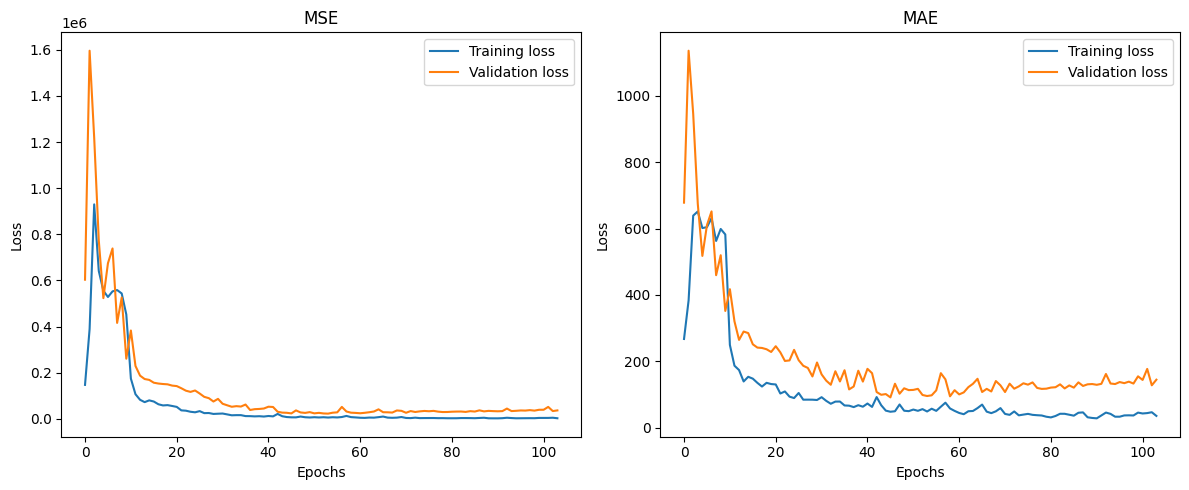

In [271]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training loss')
plt.plot(history.history['val_mae'], label='Validation loss')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("C:/Users/BrunoNad/Documents/Project_consumption/curve_loss_keras_tuner1.png")
plt.tight_layout()
plt.show()

In [273]:
print("MAE: ",mean_absolute_error(nn.predict(Xtest_seq).flatten(),ytest_adj),"\n MSE: ",mean_squared_error(nn.predict(Xtest_seq).flatten(),ytest_adj),"\n MAPE: ",round(mean_absolute_percentage_error(nn.predict(Xtest_seq).flatten(),ytest_adj)*100,2),"%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
MAE:  64.88169357567503 
 MSE:  7153.653703203101 
 MAPE:  13.3 %


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


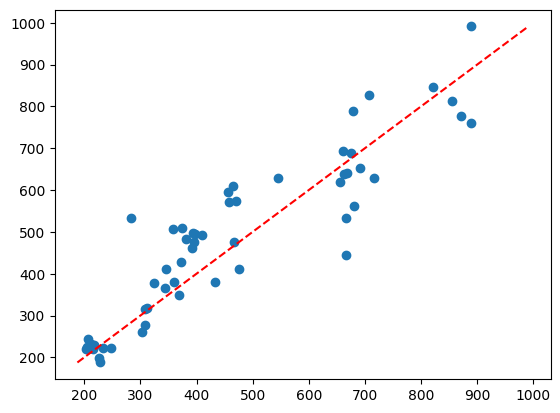

In [278]:
min_val = min(min(ytest_adj), min(nn.predict(Xtest_seq).flatten()))
max_val = max(max(ytest_adj), max(nn.predict(Xtest_seq).flatten()))

x = np.linspace(min_val, max_val, 100)
y = x

plt.scatter(ytest_adj,nn.predict(Xtest_seq).flatten())
plt.plot(x, y, color='red', linestyle='--')
plt.show()

In [279]:
pd.DataFrame({'actual':ytest_adj,'predicted':nn.predict(Xtest_seq).flatten(),'difference':abs(nn.predict(Xtest_seq).flatten()-ytest_adj)})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,actual,predicted,difference
0,545.0,627.736267,82.736267
1,465.8,610.120239,144.320239
2,470.8,573.172180,102.372180
3,457.1,570.637085,113.537085
4,456.2,596.143616,139.943616
5,466.4,475.763153,9.363153
6,394.5,498.142181,103.642181
7,395.8,475.193573,79.393573
8,391.8,460.589722,68.789722
9,397.4,493.967468,96.567468


In [47]:
nn.save(r"C:/Users/BrunoNad/Documents/Project_consumption/keras_tuner1.keras")

In [110]:
nn = load_model(r"C:/Users/BrunoNad/Documents/Project_consumption/keras_tuner1.keras")

In [111]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 504)         │     1,040,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 3, 504)         │     2,034,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3, 504)         │     2,034,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3, 504)         │     2,034,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 168)            │       452,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           169 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,785,341 (86.92 MB)

 Trainable params: 7,595,113 (28.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,190,228 (57.95 MB)